<a href="https://colab.research.google.com/github/15021996/Loan-Default-Prediction/blob/main/Soumya_Loan_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Loan Default Prediction : Predicting whether a customer will default on a loan.</u></b>

### Numerous companies from financial indutry often invest considerable resources to improve their predictive models with the aim of having better insights into their customers. Such an interest in model improvement has intensified in recent years mostly because of fast development of machine learning and artificial intelligence. For standard lending institution default predictive model with high performance helps to considerably minimize Credit Loss, resulting in higher revenue and profits. Usually the better predictive model the more efficient is the underwriting policy and collection process. A well-functioning model should distinguish creditworthy customers from those that are credit risks. Often, more-predictive credit-decisioning model can identify a greater number of customers within an institution’s specified risk tolerance, which should expand revenues as well.

### In this project the goal is to increase detection of defaulted loans before the loan is issued/offered by P2P lending company - Lending Club. Peer-to-peer lending differs from traditional financial institutions like banks or commercial lending companies.

### So, Lending Club is a mediator between investors and borrowers, earning money by charging both. The main Lending Club interest is to attract more clients and maintain protfolio size. The motivation of borrowers is clear, they want to find as cheap capital as possible, so they're seeking for the best offer at the market, which is available for them. In case of investors the motivation is obvious as well. Investors look for high ROI (return of investments), but remembering that returns are proportional to risks, we may formalize saying, that investors look for appropriate returns/risks ratio. If investors experience losses it may cause churn rate growth.

### The underwriting process for Lending Club looks like this. Borrower applies for the loan, then if he/she meets all the basic requirements - Lending Club using their scoring model assigns client to respective grade. There are 7 grades and 35 sub-grades. Interest rate is dependent on sub-grade. After that, Lending Club gives access to the loan for investors with information about the loan and the borrower (incl. grade and sub-grade) and investors decide whether or not to invest money in this loan. The lower the grade the higher the interest rate, which means, that investors may take higher risks to gain potentially higher returns.

### Seeking for default rate reduction we can end up with too restrictive underwriting policy which does not neccessary correlate with higher ROI for investors, because we'll not let investors choose risky loans, which means lower interests. For Lending Club it probably means the loss of investors with high risk appetite and borrowers with weak credit history, or in case of Lending Club those who need higher loan amount.

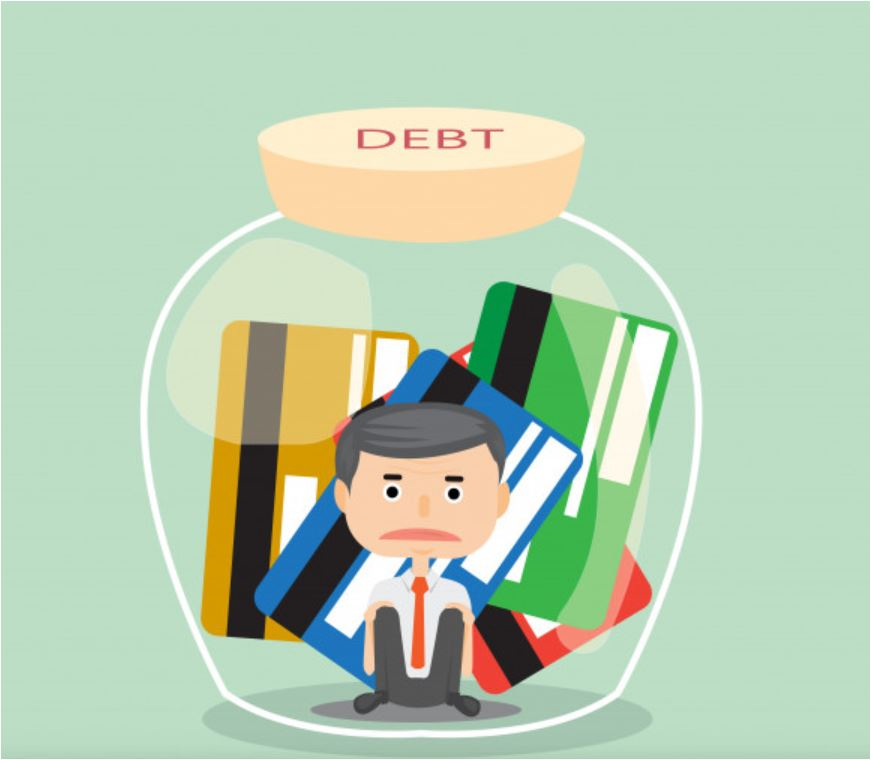

In [453]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.stats import boxcox
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [454]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [455]:
data1 = pd.read_csv("/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 3/Capstone-Project 2/LCDataDictionary.csv")
list(data1.columns.values)

['LoanStatNew', 'Description']

In [456]:
data1.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


In [457]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  115 non-null    object
 1   Description  116 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [458]:
data2 = pd.read_csv("/content/drive/MyDrive/AlmaBetter/CohortAravali/Cohort Aravali/Module 3/Capstone-Project 2/lending_club_loans.csv",skiprows=1)
list(data2.columns.values)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [459]:
data2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [460]:
data2.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,42535.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42390.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,717.052545,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,11.849562,11.815891,12005.641023,11298.592611,9664.271346,2239.547094,1.515321,100.307353,13.956737,2612.720097,689.305302,676.382744,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.143039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,36.188439,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,125.376563,125.061859,9067.243728,9010.323570,7087.469380,2583.722104,7.827800,718.078716,159.621861,4385.198940,80.202882,119.011555,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,29.359579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.000000,0.000000,5462.787435,4791.415000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.370000,644.000000,640.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [461]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 115 entries, id to total_il_high_credit_limit
dtypes: float64(90), object(25)
memory usage: 37.3+ MB


In [462]:
##Finding the the count and percentage of values that are missing in the dataframe.
data2_null = pd.DataFrame({'Count': data2.isnull().sum(), 'Percent': 100*data2.isnull().sum()/len(data2)})

##printing columns with null count more than 0
data2_null[data2_null['Count'] > 0] 

,Count,Percent
member_id,3,0.007053
loan_amnt,3,0.007053
funded_amnt,3,0.007053
funded_amnt_inv,3,0.007053
term,3,0.007053
...,...,...
tax_liens,108,0.253891
tot_hi_cred_lim,42538,100.000000
total_bal_ex_mort,42538,100.000000
total_bc_limit,42538,100.000000


As you can see, there are a lot of columns which have huge chunk of data missing. These columns are not necessary for our analysis. The following part will drop any columns where 99% or more data is missing. This will help us clean the Dataset a little bit.

In [463]:
columns_wit99nans=data2[data2.columns[data2.isnull().mean() > 0.99]].columns.to_list()

In [464]:
data2[data2['loan_status'].isna()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39786,Loans that do not meet the credit policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42537,Total amount funded in policy code 2: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [465]:
data2['loan_status'].isna().sum()

3

In [466]:
data2=data2[~data2['loan_status'].isna()]

In [467]:
data2.drop(columns=columns_wit99nans,inplace=True)

In [468]:
data2.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,744.0,740.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,499.0,0.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Sep-2016,719.0,715.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,604.0,600.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,695.0,699.0,0.0,38.0,NaN,15.0,0.0,27783.0,53.9%,38.0,f,270.78,270.78,3784.490000,3784.49,2729.22,1055.27,0.00,0.00,0.00,Sep-2016,67.79,Oct-2016,Sep-2016,694.0,690.0,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0


In [469]:
len(data2.columns)

61

In [470]:
data2["loan_status"].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [471]:
print(data2.emp_title.value_counts())


US Army                              139
Bank of America                      115
IBM                                   72
AT&T                                  61
Kaiser Permanente                     61
                                    ... 
Laird Broadcasting WDUX AM-FM          1
Baraboo-Dells Flight Center  Inc.      1
Mississippi Power                      1
BETA Group                             1
Aurora Public Schools                  1
Name: emp_title, Length: 30658, dtype: int64


In [472]:
data2.tax_liens.value_counts()

0.0    42429
1.0        1
Name: tax_liens, dtype: int64

A tax lien is a lien imposed by law upon a property to secure the payment of taxes. A tax lien may be imposed for delinquent taxes owed on real property or personal property, or as a result of failure to pay income taxes or other taxes.

In [473]:
data2.pub_rec_bankruptcies.value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

All documnets filled for bankruptcy available for public viewing.



In [474]:
data2.delinq_amnt.value_counts()

0.0       42504
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64

In the personal finance field, the term "delinquent" commonly refers to a situation where a borrower is late or overdue on a payment, such as income taxes, a mortgage, an automobile loan, or a credit card account.

There are consequences for being delinquent, depending on the type, duration, and cause of the delinquency. People who are late with a credit card payment may be forced to pay a late fee. In the case of a mortgage, the lender can initialize foreclosure proceedings if the mortgage payments are not brought up to date within a certain amount of time.

In [475]:
data2.chargeoff_within_12_mths.value_counts()

0.0    42390
Name: chargeoff_within_12_mths, dtype: int64

A charge-off is a debt, for example on a credit card, that is deemed unlikely to be collected by the creditor because the borrower has become substantially delinquent after a period of time. However, a charge-off does not mean a write-off of the debt entirely. Having a charge-off can mean serious repercussions on your credit history and future borrowing ability.

In [476]:
data2.acc_now_delinq.value_counts()

0.0    42502
1.0        4
Name: acc_now_delinq, dtype: int64

The number of accounts on which the borrower is now delinquent.

In [477]:
data2.application_type.value_counts()

INDIVIDUAL    42535
Name: application_type, dtype: int64

Can drop this column as it has only 1 unique value.

In [478]:
data2.policy_code.value_counts()

1.0    42535
Name: policy_code, dtype: int64

Can drop this column as it is of no relevance to our model.

In [479]:
data2.collections_12_mths_ex_med.value_counts()

0.0    42390
Name: collections_12_mths_ex_med, dtype: int64

Number of collections in 12 months excluding medical collections.

In [480]:
data2.last_fico_range_low.value_counts(ascending=True)

845.0       8
840.0      37
835.0      41
830.0     129
825.0     153
         ... 
715.0    1230
710.0    1245
695.0    1248
690.0    1267
705.0    1283
Name: last_fico_range_low, Length: 71, dtype: int64

One of the most well-known types of credit score are FICO® Scores, created by the Fair Isaac Corporation. FICO® Scores are used by many lenders, and often range from 300 to 850. A FICO® Score of 670 or above is considered a good credit score, while a score of 800 or above is considered exceptional.

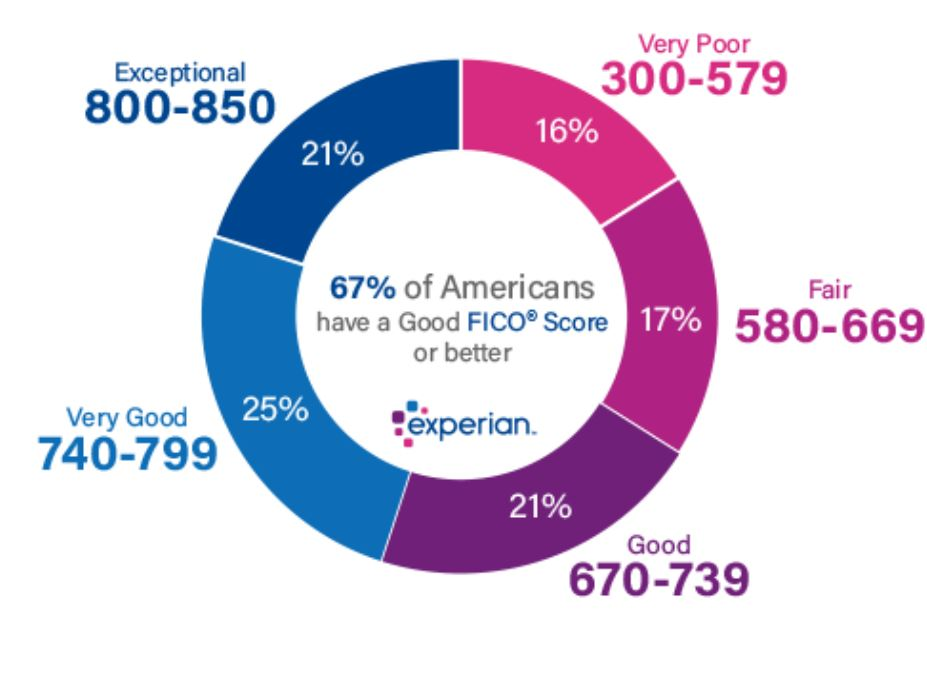

In [481]:
data2.last_fico_range_low[data2.last_fico_range_low > 670].count()

26443

In [482]:
data2.last_fico_range_high.value_counts(ascending=True)

850.0       8
844.0      37
0.0        38
839.0      41
834.0     129
         ... 
719.0    1230
714.0    1245
699.0    1248
694.0    1267
709.0    1283
Name: last_fico_range_high, Length: 72, dtype: int64

In [483]:
data2['last_fico_range'] = data2.last_fico_range_low.astype('str') + '-' + data2.last_fico_range_high.astype('str')
data2['last_meanfico'] = (data2.last_fico_range_low + data2.last_fico_range_high)/2
data2.drop(['last_fico_range_low','last_fico_range_high'],1, inplace=True)

In [484]:
data2.last_credit_pull_d.value_counts()

Sep-2016    16232
Mar-2016      859
Aug-2016      771
Apr-2016      700
Feb-2013      696
            ...  
Oct-2007        3
Jul-2008        1
May-2008        1
Jun-2008        1
Jul-2007        1
Name: last_credit_pull_d, Length: 111, dtype: int64

The date of last activity tells you when your account took on a certain status. That status could be anything—paid, delinquent, or collections. If your date of last activity is for a negative status such as a charge off, then the older it is the less impact it will have on your credit.  On the other hand, if you haven’t used a credit card in a long time and your date of last activity is many months ago, the information on your credit account may not be used when calculating your credit score. This is particularly problematic if you have few open credit accounts and you’re trying to reestablish your credit history.  Try to use your credit accounts on a regular basis so that the positive information is used when calculating your FICO score.

In [485]:
data2.last_pymnt_amnt.value_counts(ascending=True)

3369.70      1
10766.81     1
344.85       1
921.39       1
91.13        1
            ..
150.00      13
100.00      17
50.00       17
200.00      19
0.00        96
Name: last_pymnt_amnt, Length: 37117, dtype: int64

Last total payment amount received from the borrower.

In [486]:
data2.last_pymnt_d.value_counts()

Mar-2013    1070
Dec-2014     949
May-2013     943
Feb-2013     906
Mar-2012     893
            ... 
Jun-2008      20
Mar-2008      18
Jan-2008      11
Feb-2008       8
Dec-2007       2
Name: last_pymnt_d, Length: 106, dtype: int64

The month-year in which last payment was recieved.

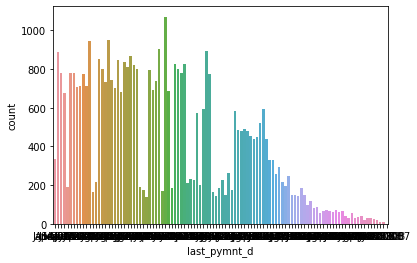

In [487]:
# sns.countplot(data=df1, x='last_pymnt_d', order=df1.last_pymnt_d.value_counts().index)
sns.countplot(data2['last_pymnt_d'])

In [488]:
data2.collection_recovery_fee.value_counts(ascending=True)

11.4154         1
2.5867          1
9.5864          1
247.5144        1
15.1732         1
            ...  
1.6000         10
0.8000         10
1.2000         11
2.0000         15
0.0000      38243
Name: collection_recovery_fee, Length: 2859, dtype: int64

A charge-off or chargeoff is a declaration by a creditor (usually a credit card account) that an amount of debt is unlikely to be collected. This occurs when a consumer becomes severely delinquent on a debt. Traditionally, creditors make this declaration at the point of six months without payment. 

In [489]:
data2.recoveries.value_counts(ascending=True)

384.42         1
20.12          1
318.99         1
1007.13        1
202.70         1
           ...  
13.59          3
10.40          4
11.29          4
13.93          4
0.00       37789
Name: recoveries, Length: 4530, dtype: int64

LendingClub may sell charged-off loans to a third party. In the event that a charged-off loan is sold to a third party or funds are recovered on a previously charged off loan, investors will receive a pro rata share of the sales proceeds or recovery amount, respectively, less any fees. In general, recoveries on previously charged-off loans are infrequent. 

In [490]:
data2.term.value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

##Trying to remove constant features

In [491]:
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 3:
            const_features.append(column)
    return const_features
const_features = find_constant_features(data2)

print(const_features)

['term', 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'chargeoff_within_12_mths']


In [492]:
data2.drop(const_features, axis = 1, inplace = True)

In [493]:
 data2['loan_status']=data2.loan_status.astype(object)

In [494]:
# dic = {"loan_status":{ "Fully Paid": 0, "Charged Off": 1,'Does not meet the credit policy. Status:Fully Paid':1,
# 'Does not meet the credit policy. Status:Charged Off':1,'In Grace Period':1,'Late (31-120 days)':1 ,'Late (16-30 days)':1,'Default':1}}
# data2 = data2.replace(dic)

In [495]:
pd.value_counts(data2.loan_status).to_frame().reset_index()

,index,loan_status
0,Fully Paid,33586
1,Charged Off,5653
2,Does not meet the credit policy. Status:Fully ...,1988
3,Does not meet the credit policy. Status:Charge...,761
4,Current,513
5,In Grace Period,16
6,Late (31-120 days),12
7,Late (16-30 days),5
8,Default,1


In [496]:
data2=data2[data2['loan_status']!='Current']

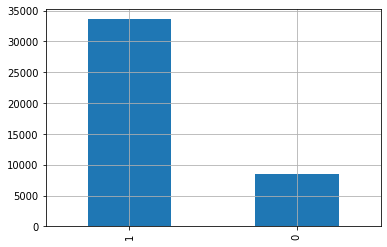

In [497]:
data2["rating"] = np.where((data2.loan_status == 'Fully Paid'), 1, 0)
data2['rating'].value_counts().plot(kind = 'bar', grid = True)

In [498]:
# data2['rating'] = np.where((data2.loan_status != 'Current'), 1, 0)

In [499]:
pd.value_counts(data2.rating).to_frame()

,rating
1,33586
0,8436


In [500]:
print ('Bad Loan Ratio: %.2f%%'  % ((1-(data2.rating.sum()/len(data2)))*100))

Bad Loan Ratio: 20.08%


In [501]:
data2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range,last_meanfico,rating
0,1077501,1296599.0,5000.0,5000.0,4975.0,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-2015,171.62,NaN,Sep-2016,0.0,0.0,0.0,0.0,740.0-744.0,742.0,1
1,1077430,1314167.0,2500.0,2500.0,2500.0,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2016,0.0,0.0,0.0,0.0,0.0-499.0,249.5,0
2,1077175,1313524.0,2400.0,2400.0,2400.0,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-2014,649.91,NaN,Sep-2016,0.0,0.0,0.0,0.0,715.0-719.0,717.0,1
3,1076863,1277178.0,10000.0,10000.0,10000.0,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,690.0,694.0,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-2015,357.48,NaN,Apr-2016,0.0,0.0,0.0,0.0,600.0-604.0,602.0,1
5,1075269,1311441.0,5000.0,5000.0,5000.0,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,730.0,734.0,3.0,NaN,NaN,9.0,0.0,7963.0,28.3%,12.0,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-2015,161.03,NaN,Jan-2016,0.0,0.0,0.0,0.0,675.0-679.0,677.0,1


In [502]:
data2.iloc[0:5, 45: 61]

,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range,last_meanfico,rating
0,171.62,NaN,Sep-2016,0.0,0.0,0.0,0.0,740.0-744.0,742.0,1
1,119.66,NaN,Sep-2016,0.0,0.0,0.0,0.0,0.0-499.0,249.5,0
2,649.91,NaN,Sep-2016,0.0,0.0,0.0,0.0,715.0-719.0,717.0,1
3,357.48,NaN,Apr-2016,0.0,0.0,0.0,0.0,600.0-604.0,602.0,1
5,161.03,NaN,Jan-2016,0.0,0.0,0.0,0.0,675.0-679.0,677.0,1


In [503]:
data2.loan_status.value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [504]:
data2.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range,last_meanfico,rating
0,1077501,1296599.0,5000.0,5000.0,4975.0,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-2015,171.62,NaN,Sep-2016,0.0,0.0,0.0,0.0,740.0-744.0,742.0,1


In [505]:
features_to_be_removed = []
features_to_be_removed.extend(['tax_liens', 'pub_rec_bankruptcies', 'delinq_amnt', 
                               'acc_now_delinq','next_pymnt_d','recoveries'])

In [506]:
len(set(features_to_be_removed))

6

In [507]:
print(features_to_be_removed)

['tax_liens', 'pub_rec_bankruptcies', 'delinq_amnt', 'acc_now_delinq', 'next_pymnt_d', 'recoveries']


In [508]:
df_selected = data2.drop(list(set(features_to_be_removed)), axis = 1)
df_selected.shape

(42022, 49)

In [509]:
df_selected.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range', 'last_meanfico', 'rating'],
      dtype='object')

##int_rate': 'Interest Rate on the loan.

In [510]:
df_selected['int_rate'] = df_selected['int_rate'].replace("%","", regex=True).astype(float)

emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [511]:
df_selected['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df_selected['emp_length'].fillna(value=df_selected['emp_length'].mode(),inplace=True)

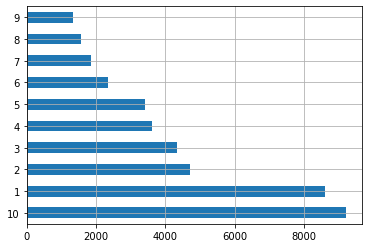

In [512]:
df_selected['annual_inc'].fillna(method='ffill',inplace=True)
df_selected['emp_length'].value_counts().plot(kind='barh',grid=True)

In [513]:
df_selected.drop(['member_id','id','sub_grade','home_ownership','loan_status','emp_title','url', 'desc'],axis=1, inplace=True)

After analyzing the columns, we can conclude that the following features can be removed:

id — randomly generated field by Lending Club for unique identification purposes only.

member_id — also randomly generated field by Lending Club for identification purposes only.

home_ownership- We One hot code that column so we don't need that column any more

loan_status-We maked our Target variable using this column so we drop this column also.

sub_grade — contains redundant information that is already in the grade column (more below).


emp_title — requires other data and a lot of processing to become potentially useful

## Purpose

In [514]:
df_selected['purpose'].isna().sum()

0

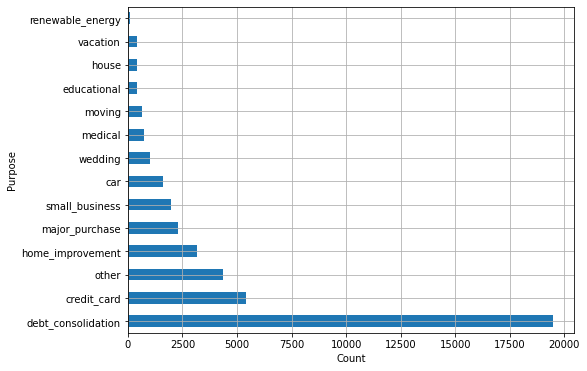

In [515]:
plt.figure(figsize= (8,6))
plt.ylabel('Purpose')
plt.xlabel('Count')
df_selected['purpose'].value_counts().plot(kind = 'barh', grid = True)
plt.show()

In [516]:
df_selected.drop(['title','zip_code'],axis=1, inplace=True)

In [517]:
pd.value_counts(df_selected.grade).to_frame()

,grade
B,12240
A,10163
C,8618
D,5909
E,3320
F,1266
G,506


In [518]:
grade=df_selected.grade.unique()
grade.sort()
grade

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [519]:
for x,e in enumerate(grade):
    df_selected.grade.replace(to_replace=e,value=x,inplace=True)

In [520]:
df_selected.grade.unique()

array([1, 2, 0, 4, 5, 3, 6])

In [521]:
df_selected['rating']=df_selected['rating'].astype(int)

In [522]:
pd.value_counts(df_selected.emp_length).to_frame()

,emp_length
10,9199
1,8596
2,4701
3,4322
4,3604
5,3423
6,2347
7,1843
8,1566
9,1328


In [523]:
emp_len={'n/a':0,'< 1 year':1,'1 year':2,'2 years':3,'3 years':4,'4 years':5,'5 years':6,'6 years':7,'7 years':8,'8 years':9,'9 years':10,'10+ years':11}
df_selected.emp_length.replace(emp_len,inplace=True)
df_selected.emp_length=df_selected.emp_length.replace(np.nan,0)
df_selected.emp_length.unique()


array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', 0], dtype=object)

In [524]:
pd.value_counts(df_selected.verification_status).to_frame()

,verification_status
Not Verified,18679
Verified,13176
Source Verified,10167


In [525]:
df_selected['avg_fico_score'] = (df_selected['fico_range_high'] + df_selected['fico_range_low'])/2.0
df_selected.drop(['fico_range_low','fico_range_high'], axis=1, inplace=True)

There are couple variables that can be transformed to date time.

In [526]:
df_selected.issue_d=pd.to_datetime(df_selected.issue_d)

In [527]:
earliest_cr_line=pd.to_datetime(df_selected.earliest_cr_line)
df_selected.earliest_cr_line=earliest_cr_line.dt.year

In [528]:
df_selected.last_pymnt_d=pd.to_datetime(df_selected.last_pymnt_d)
df_selected.last_credit_pull_d=pd.to_datetime(df_selected.last_credit_pull_d)

In [529]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42022 entries, 0 to 42535
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                42022 non-null  float64       
 1   funded_amnt              42022 non-null  float64       
 2   funded_amnt_inv          42022 non-null  float64       
 3   int_rate                 42022 non-null  float64       
 4   installment              42022 non-null  float64       
 5   grade                    42022 non-null  int64         
 6   emp_length               42022 non-null  object        
 7   annual_inc               42022 non-null  float64       
 8   verification_status      42022 non-null  object        
 9   issue_d                  42022 non-null  datetime64[ns]
 10  purpose                  42022 non-null  object        
 11  addr_state               42022 non-null  object        
 12  dti                      42022 n

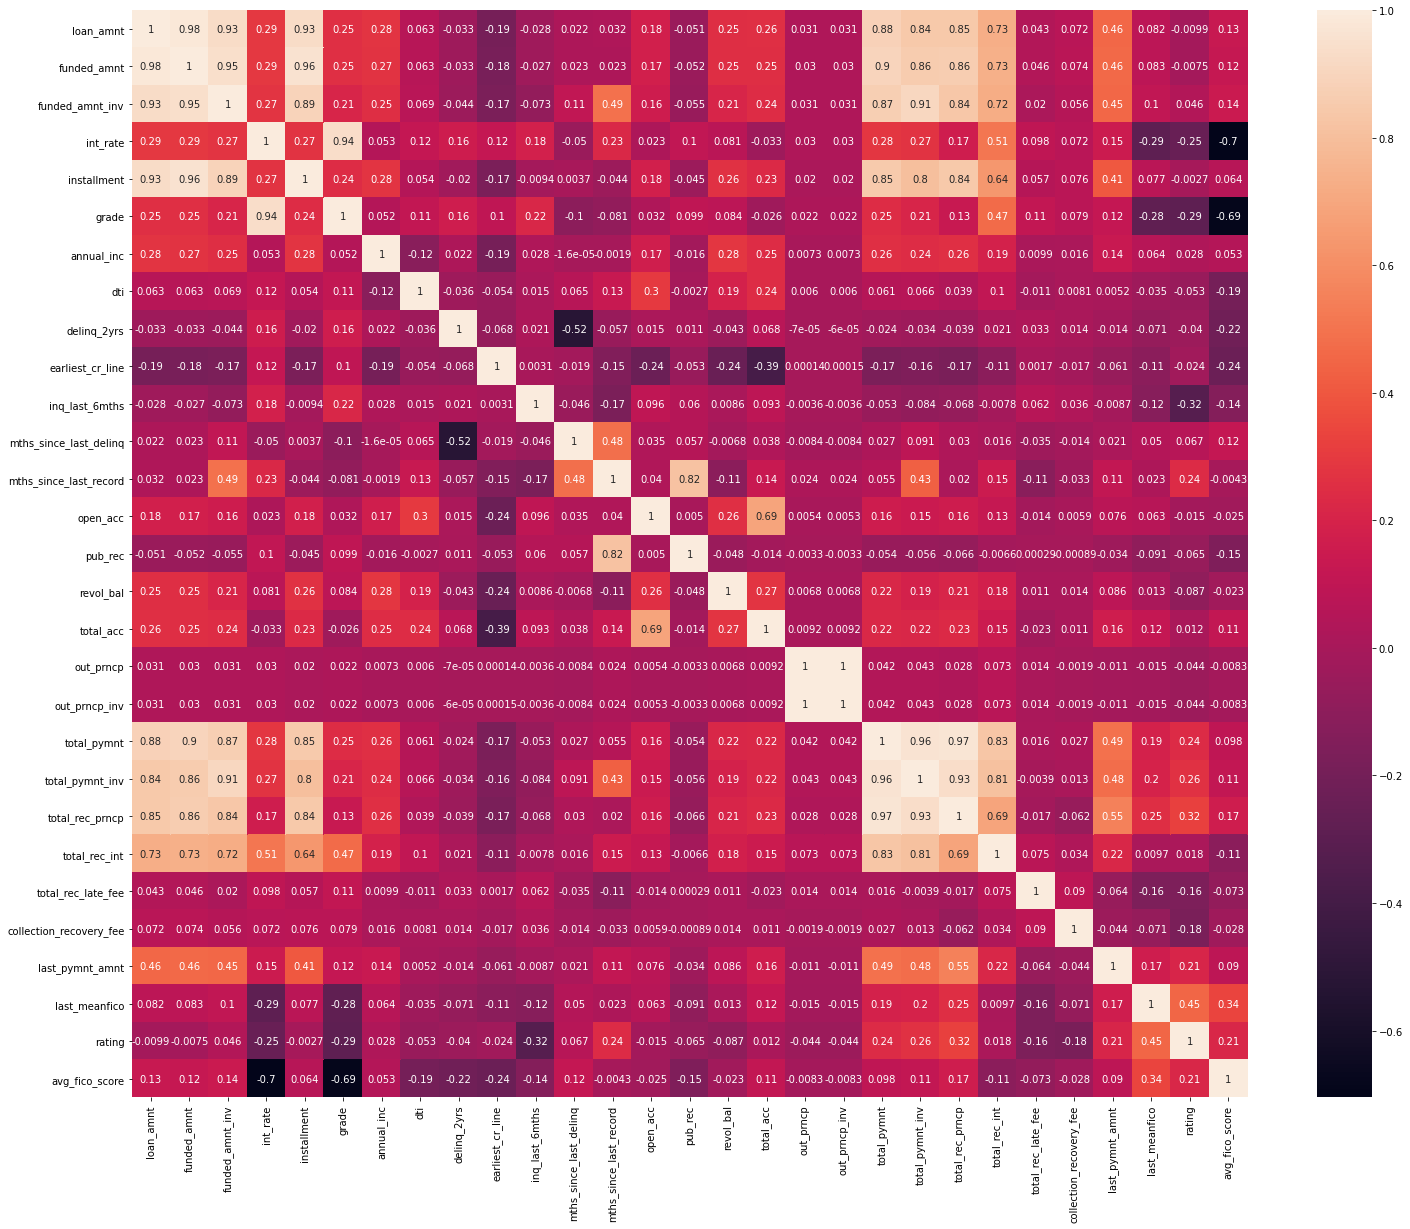

In [530]:
corr = df_selected.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corr,annot=True)
plt.show()

In [531]:
corr.loc[:,'rating']

loan_amnt                 -0.009945
funded_amnt               -0.007466
funded_amnt_inv            0.045729
int_rate                  -0.246674
installment               -0.002663
grade                     -0.285701
annual_inc                 0.028112
dti                       -0.053091
delinq_2yrs               -0.039705
earliest_cr_line          -0.024128
inq_last_6mths            -0.321145
mths_since_last_delinq     0.067355
mths_since_last_record     0.239321
open_acc                  -0.015145
pub_rec                   -0.064962
revol_bal                 -0.086995
total_acc                  0.011673
out_prncp                 -0.043858
out_prncp_inv             -0.043852
total_pymnt                0.236297
total_pymnt_inv            0.260878
total_rec_prncp            0.322034
total_rec_int              0.018280
total_rec_late_fee        -0.160813
collection_recovery_fee   -0.175535
last_pymnt_amnt            0.213636
last_meanfico              0.453220
rating                     1

## Imputing missing values

There are observations that contain missing values, I will review and transform them variable by variable.

Starting with defining a function to create a data frame of metadata containing count of null values and type.

In [532]:
def meta (dataframe):
    metadata = []
    for f in df_selected.columns:
    
        # Counting null values
        null = df_selected[f].isnull().sum()
    
        # Defining the data type 
        dtype = df_selected[f].dtype
    
        # Creating a Dict that contains all the metadata for the variable
        f_dict = {
            'varname': f,
            'nulls':null,
            'dtype': dtype
        }
        metadata.append(f_dict)

    meta = pd.DataFrame(metadata, columns=['varname','nulls', 'dtype'])
    meta.set_index('varname', inplace=True)
    meta=meta.sort_values(by=['nulls'],ascending=False)
    return meta

In [533]:
meta(df_selected)

,nulls,dtype
varname,,
mths_since_last_record,38387,float64
mths_since_last_delinq,26569,float64
revol_util,90,object
last_pymnt_d,83,datetime64[ns]
pub_rec,29,float64
delinq_2yrs,29,float64
open_acc,29,float64
inq_last_6mths,29,float64
earliest_cr_line,29,float64


In [534]:
pd.value_counts(df_selected.mths_since_last_record).unique()

array([1275,   69,   67,   66,   62,   61,   60,   57,   56,   55,   54,
         53,   51,   50,   49,   46,   44,   41,   40,   18,   16,   15,
         14,   13,   12,   11,   10,    9,    8,    7,    6,    5,    4,
          3,    2,    1])

In [535]:
pd.value_counts(df_selected.mths_since_last_delinq).unique()

array([821, 268, 265, 262, 261, 249, 248, 245, 242, 239, 238, 237, 236,
       235, 234, 232, 229, 227, 224, 221, 218, 216, 214, 212, 209, 208,
       204, 203, 202, 197, 194, 189, 187, 182, 164, 160, 157, 154, 153,
       147, 145, 143, 142, 141, 137, 133, 132, 131, 130, 129, 128, 126,
       124, 122, 121, 116, 115, 114, 113, 111, 109, 106, 105, 100,  99,
        98,  57,  32,   6,   2,   1])

Null values in these columns can't be replaced with 0 as it would mean that the last occurence was very recent. My understanding of these variables is that the key information is whether the specific action took place (delinquency), so I will turn these into binary categories of Yes (1), No (0).

In [536]:
df_selected.loc[(df_selected.mths_since_last_delinq.notnull()),'delinq']=1
df_selected.loc[(df_selected.mths_since_last_delinq.isnull()),'delinq']=0
df_selected.drop(['mths_since_last_delinq','mths_since_last_record'],axis=1,inplace=True)
meta(df_selected)

,nulls,dtype
varname,,
revol_util,90,object
last_pymnt_d,83,datetime64[ns]
total_acc,29,float64
pub_rec,29,float64
open_acc,29,float64
inq_last_6mths,29,float64
earliest_cr_line,29,float64
delinq_2yrs,29,float64
last_credit_pull_d,4,datetime64[ns]


In [537]:
df_selected.revol_util=df_selected.revol_util.replace(np.nan,0)
    
meta(df_selected)

,nulls,dtype
varname,,
last_pymnt_d,83,datetime64[ns]
total_acc,29,float64
pub_rec,29,float64
open_acc,29,float64
inq_last_6mths,29,float64
earliest_cr_line,29,float64
delinq_2yrs,29,float64
last_credit_pull_d,4,datetime64[ns]
total_rec_prncp,0,float64


There are four datetime variables and three of them have missing values left.

Variables last_credit_pull_d is the most recent month LC pulled credit for this loan, issue_d is the date loan was issued and next_payment_d is the date of next payment. There are not insightful variables so will be dropped.

I will check last_pymnt_d in more detail as this might have some predicitve value.

In [538]:
pd.value_counts(df_selected.last_pymnt_d).to_frame()

,last_pymnt_d
2013-03-01,1070
2014-12-01,949
2013-05-01,943
2013-02-01,906
2012-03-01,893
...,...
2008-06-01,20
2008-03-01,18
2008-01-01,11
2008-02-01,8


In [539]:
late=df_selected.loc[(df_selected.last_pymnt_d=='2015-08-01')|(df_selected.last_pymnt_d=='2015-09-01')|(df_selected.last_pymnt_d=='2015-05-01')|(df_selected.last_pymnt_d=='2015-06-01')]
pd.value_counts(late.rating).to_frame()

,rating
1,692
0,113


In [540]:
df_selected.loc[(df_selected.last_pymnt_d.notnull()),'pymnt_received']=1
df_selected.loc[(df_selected.last_pymnt_d.isnull()),'pymnt_received']=0

In [541]:
df_selected.drop(['last_pymnt_d','issue_d','last_credit_pull_d'],axis=1,inplace=True)

meta(df_selected)

,nulls,dtype
varname,,
total_acc,29,float64
pub_rec,29,float64
open_acc,29,float64
inq_last_6mths,29,float64
earliest_cr_line,29,float64
delinq_2yrs,29,float64
out_prncp_inv,0,float64
total_pymnt,0,float64
total_pymnt_inv,0,float64


In [542]:
variables3=['open_acc', 'total_acc','pub_rec','delinq_2yrs','inq_last_6mths','earliest_cr_line']

for e in variables3:
    df_selected[e]=df_selected[e].replace(np.nan,df_selected[e].mode()[0])
    
meta(df_selected)

,nulls,dtype
varname,,
loan_amnt,0,float64
total_rec_late_fee,0,float64
out_prncp,0,float64
out_prncp_inv,0,float64
total_pymnt,0,float64
total_pymnt_inv,0,float64
total_rec_prncp,0,float64
total_rec_int,0,float64
collection_recovery_fee,0,float64


## Preparing data for modelling

In [543]:
df_selected.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,last_fico_range,last_meanfico,rating,avg_fico_score,delinq,pymnt_received
0,5000.0,5000.0,4975.0,10.65,162.87,1,10,24000.0,Verified,credit_card,AZ,27.65,0.0,1985.0,1.0,3.0,0.0,13648.0,83.7%,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,171.62,740.0-744.0,742.0,1,737.0,0.0,1.0
1,2500.0,2500.0,2500.0,15.27,59.83,2,1,30000.0,Source Verified,car,GA,1.00,0.0,1999.0,5.0,3.0,0.0,1687.0,9.4%,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,119.66,0.0-499.0,249.5,0,742.0,0.0,1.0
2,2400.0,2400.0,2400.0,15.96,84.33,2,10,12252.0,Not Verified,small_business,IL,8.72,0.0,2001.0,2.0,2.0,0.0,2956.0,98.5%,10.0,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,649.91,715.0-719.0,717.0,1,737.0,0.0,1.0
3,10000.0,10000.0,10000.0,13.49,339.31,2,10,49200.0,Source Verified,other,CA,20.00,0.0,1996.0,1.0,10.0,0.0,5598.0,21%,37.0,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,357.48,600.0-604.0,602.0,1,692.0,1.0,1.0
5,5000.0,5000.0,5000.0,7.90,156.46,0,3,36000.0,Source Verified,wedding,AZ,11.20,0.0,2004.0,3.0,9.0,0.0,7963.0,28.3%,12.0,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,161.03,675.0-679.0,677.0,1,732.0,0.0,1.0
